<a href="https://colab.research.google.com/github/rudzbart/175IC-machine-learning/blob/main/Zad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R2 score: 0.7435
MAE wynosi: 4507.92
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     401.2
Date:                Fri, 27 Nov 2020   Prob (F-statistic):          1.58e-314
Time:                        14:32:54   Log-Likelihood:                -10805.
No. Observations:                1070   AIC:                         2.163e+04
Df Residuals:                    1061   BIC:                         2.167e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

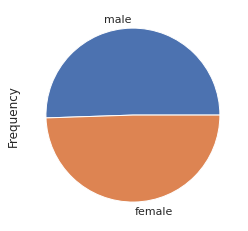

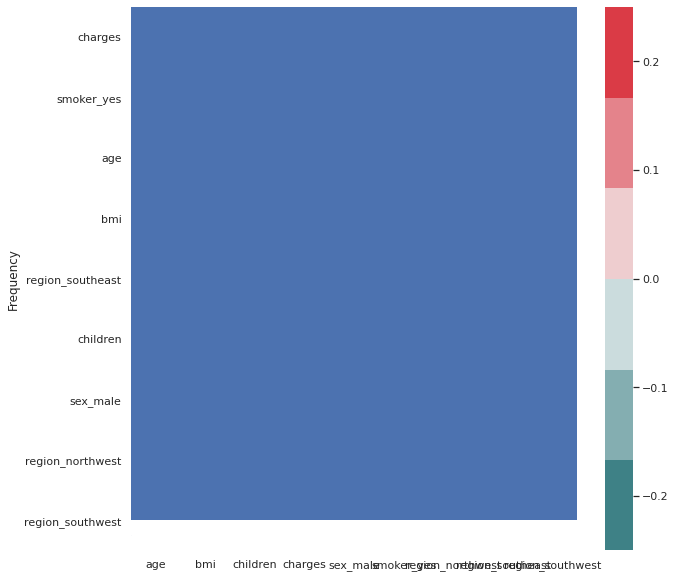

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import statsmodels.api as sm
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

np.random.seed(69)

df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()
df = df_raw.copy()
df[df.duplicated()]
for col in ['sex', 'smoker', 'region']:
    df[col] = df[col].astype('category')
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
df.charges.plot(kind='hist', bins=30)


px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')

df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

corr = df_dummies.corr()
corr

sns.set(style="white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.25, vmin=-0.25)

df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

output = df_dummies['charges']
input = df_dummies.drop(columns='charges')

x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)


regressor = LinearRegression()
regressor.fit(x_train, y_train)
r2=regressor.score(x_test,y_test)
print(f'R2 score: {regressor.score(x_test, y_test):.4f}')

y_pred = regressor.predict(x_test)
y_pred[:10]

y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

predictions.error.plot(kind='hist',bins=30)
mae = mean_absolute_error(y_true, y_pred)
srednia = sklearn.metrics.mean_absolute_error(y_true,y_pred)
print(f'MAE wynosi: {mae:.2f}')

x_train_ols = sm.add_constant(x_train.values)
ols = sm.OLS(endog=y_train, exog=x_train_ols).fit()
predictors = ['const'] + list(x_train.columns)
print(ols.summary(xname=predictors))

df_without_cols = df_dummies.drop(columns=['children','sex_male','region_northwest','region_southeast','region_southwest'])
df_without_cols.head()

output = df_without_cols['charges']
input = df_without_cols.drop(columns='charges')
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(input,output,test_size=0.2)
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x_train,y_train)
print(f'Wynik ponownej regresji : {regressor.score(x_test,y_test)}')
y_pred = regressor.predict(x_test)
y_true = y_test.copy()
print(f'Średnia ponowna:  {sklearn.metrics.mean_absolute_error(y_true,y_pred)}')
raw_size = sys.getsizeof(df_dummies)
cols_size = sys.getsizeof(df_without_cols)
print(f'Różnica po usunięciu zbędnych danych wynosi: {100-(cols_size/raw_size*100):.4f} procent')
print(f'Różnica regresji: {(r2-regressor.score(x_test,y_test)):.4f}')
print(f'Różnica średniej: {(srednia-sklearn.metrics.mean_absolute_error(y_true,y_pred)):.4f}')
